In [3]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

In [24]:
img_width, img_height = 256, 256

batchsize = 64
data_dir = "images"
train_data = keras.utils.image_dataset_from_directory(
    directory= data_dir,
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 63565 files belonging to 1 classes.


In [25]:
# data processing

data_dir = "images"

train_data = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)
batch_size = 32
train_data = train_data.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode= None
)

Found 63565 images belonging to 1 classes.


In [31]:
import model as md

epochs = 30
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

generator = md.Generator_Model()
discriminator = md.Discriminator_Model()


dcgan = md.DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# Fit the model and save the history
history = dcgan.fit(train_data, epochs=epochs, callbacks=[md.DCGANMonitor()])

Epoch 1/30
1987/1987 [==============================] - 1154s 580ms/step - d_loss: 0.4047 - g_loss: 2.2330
Epoch 2/30
1987/1987 [==============================] - 769s 387ms/step - d_loss: 0.4119 - g_loss: 2.0639
Epoch 3/30
1987/1987 [==============================] - 771s 388ms/step - d_loss: 0.3822 - g_loss: 2.1441
Epoch 4/30
1987/1987 [==============================] - 770s 388ms/step - d_loss: 0.3167 - g_loss: 2.4987
Epoch 5/30
1987/1987 [==============================] - 770s 388ms/step - d_loss: 0.2777 - g_loss: 2.7753
Epoch 6/30
1987/1987 [==============================] - 768s 386ms/step - d_loss: 0.2628 - g_loss: 2.8867
Epoch 7/30
1987/1987 [==============================] - 766s 386ms/step - d_loss: 0.2450 - g_loss: 3.0082
Epoch 8/30
1987/1987 [==============================] - 767s 386ms/step - d_loss: 0.2433 - g_loss: 3.0370
Epoch 9/30
1987/1987 [==============================] - 765s 385ms/step - d_loss: 0.2518 - g_loss: 3.0178
Epoch 10/30
1987/1987 [======================

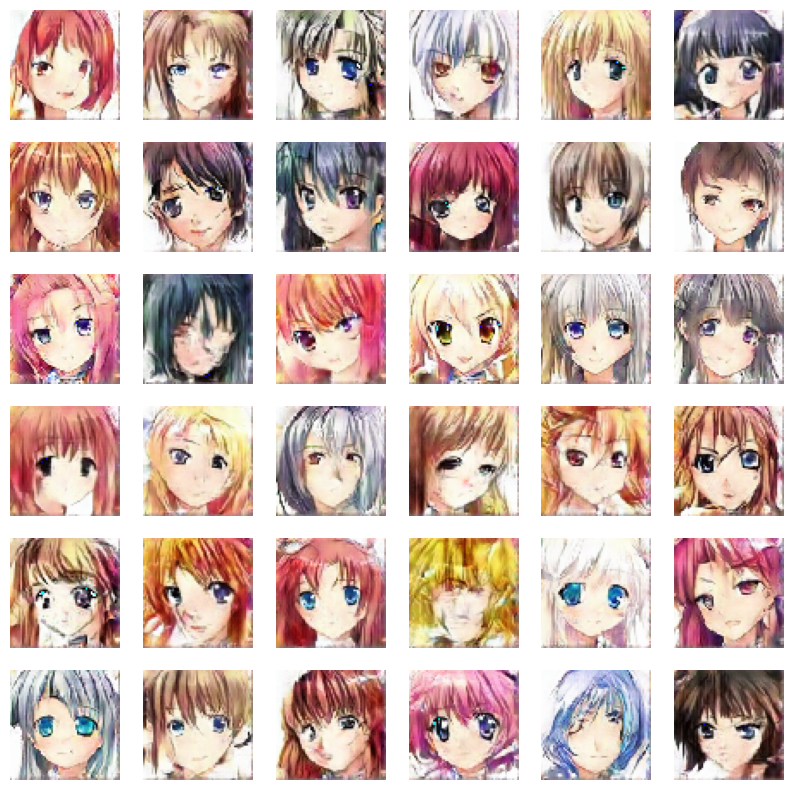

In [38]:
plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

In [28]:


if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Failed to find the default GPU.")

Failed to find the default GPU.


In [29]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [35]:
dcgan.generator.save('DCGEN-v1.h5')

C:\Users\15034\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
